<a target="_blank" href="https://colab.research.google.com/github/AgusTeresaDev/Telecom-X---Challenge-Allura/blob/master/TelecomX_LATAM.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#📌 Extracción

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [ ]:
#se importan los módulos necesarios para la recuperación de los datos y la conexión con la API
import pandas as pd
import requests
import json

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [ ]:
#solicitud de datos, respuesta y creación del dataframe
solicitud_datos = requests.get(url)
respuesta = json.loads(solicitud_datos.text)

datos_importados = pd.DataFrame(respuesta)
datos_importados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
columnas_anidadas = datos_importados.columns[2:]
columnas_anidadas

Index(['customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
datos_seleccion = datos_importados.drop(columns=columnas_anidadas)

In [ ]:
#normaliza las columnas anidadas del dataframe datos
lista_de_dataframes = []
for columna in columnas_anidadas:
  columna_temporal = pd.json_normalize(datos_importados[columna])
  lista_de_dataframes.append(columna_temporal)

lista_de_dataframes.insert(0, datos_seleccion)
datos_normalizados =  pd.concat(lista_de_dataframes, axis=1)

In [ ]:
datos_normalizados.rename(columns={"gender":"sexo"}, inplace=True)

In [ ]:
import numpy as np

In [ ]:
#elimina los supuestos clientes con cero meses de contrato
datos_normalizados = datos_normalizados[datos_normalizados['Charges.Total'] != ' ']

In [ ]:
#convierte la columna total a flotante
datos_normalizados['Charges.Total'] = datos_normalizados['Charges.Total'].astype(np.float64)

In [ ]:
#eliminar filas con Churn faltantes (224 filas)
datos_normalizados = datos_normalizados[datos_normalizados['Churn'] != ""]

In [ ]:
#hace una copia del dataframe a un archivo csv
#datos_normalizados.to_csv('datos_normalizados.csv', index=False)

In [ ]:
datos_normalizados.describe(include=['O'])

,customerID,Churn,sexo,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [ ]:
datos = pd.read_csv("/content/datos_normalizados.csv")


In [ ]:
#Calcular columna "Cuentas_Diarias". Se considera un mes promedio de 30 días
datos["Cuentas_Diarias"] = datos['Charges.Monthly'] / 30

In [ ]:
#Se remueven columnas que no se consideran necesarias para el análisis
datos.drop(columns=["customerID", "Partner", "Dependents","Charges.Total" ], inplace=True, axis=1)

In [ ]:
#Se remueve la columna PhoneService, ya que se supone que los clientes poseen ya el servicio
datos.drop(columns="PhoneService", inplace=True, axis=1)

In [ ]:
datos["SeniorCitizen"] = datos["SeniorCitizen"].replace({"0": "Menor_65", "1": "MayorIgual_65"})

In [ ]:
datos['StreamingMovies'] = datos['StreamingMovies'].replace({'No': 'No_Movies', 'Yes': 'Yes_Movies'})

/tmp/ipython-input-2299657233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['StreamingMovies'] = datos['StreamingMovies'].replace({'No': 'No_Movies', 'Yes': 'Yes_Movies'})


In [ ]:
datos["SeniorCitizen"] = datos["SeniorCitizen"].astype(str)

In [ ]:
#Se remueven los cleinets que no poseen una línea
datos = datos[datos['MultipleLines'] != "No phone service"]

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   sexo              7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   MultipleLines     7032 non-null   object 
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  PaperlessBilling  7032 non-null   object 
 14  PaymentMethod     7032 non-null   object 
 15  Charges.Monthly   7032 non-null   float64
 16  Cuentas_Diarias   7032 non-null   float64


In [ ]:
datos['MultipleLines'].value_counts()

,count
MultipleLines,
No,3385
Yes,2967


In [ ]:
#Convertir valores binarios en valores cero y uno
datos = datos.replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-2287246409.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos = datos.replace({'Yes': 1, 'No': 0})


In [ ]:
#dataframe de respaldo de datos
datos_respaldo = datos

In [ ]:
datos.head()

,Churn,sexo,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Cuentas_Diarias
0,0,Female,Menor_65,9,0,DSL,No_Security,Yes_Backup,No_Protect,Yes_Support,Yes_Streaming,No_Movies,One year,1,Mailed check,65.6,2.186667
1,0,Male,Menor_65,9,1,DSL,No_Security,No_Backup,No_Protect,No_Support,No_Streaming,Yes_Movies,Month-to-month,0,Mailed check,59.9,1.996667
2,1,Male,Menor_65,4,0,Fiber optic,No_Security,No_Backup,Yes_Protect,No_Support,No_Streaming,No_Movies,Month-to-month,1,Electronic check,73.9,2.463333
3,1,Male,MayorIgual_65,13,0,Fiber optic,No_Security,Yes_Backup,Yes_Protect,No_Support,Yes_Streaming,Yes_Movies,Month-to-month,1,Electronic check,98.0,3.266667
4,1,Female,MayorIgual_65,3,0,Fiber optic,No_Security,No_Backup,No_Protect,Yes_Support,Yes_Streaming,No_Movies,Month-to-month,1,Mailed check,83.9,2.796667


##Codificación de los datos - Feature encoding

In [ ]:
#Codificar las variables categoricas
categoricas = ["sexo", "SeniorCitizen", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod" ]

pd.get_dummies(data=datos, columns=categoricas, dtype=int)

,Churn,tenure,MultipleLines,PaperlessBilling,Charges.Monthly,Cuentas_Diarias,sexo_Female,sexo_Male,SeniorCitizen_MayorIgual_65,SeniorCitizen_Menor_65,...,StreamingMovies_No internet service,StreamingMovies_No_Movies,StreamingMovies_Yes_Movies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,0,1,65.60,2.186667,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,0,9,1,0,59.90,1.996667,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,1,4,0,1,73.90,2.463333,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,13,0,1,98.00,3.266667,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,3,0,1,83.90,2.796667,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,1,4,0,0,20.95,0.698333,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
7027,0,13,0,0,55.15,1.838333,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
7028,1,22,1,1,85.10,2.836667,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
7029,0,2,0,1,50.30,1.676667,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
#Se crea el dataframe con los datos codificados
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)

In [ ]:
#datos_codificados.to_csv("datos_codificados.csv", index=False)

In [ ]:
datos_codificados = pd.read_csv("/content/datos_codificados.csv")

#📊 Carga y análisis

##Análisis descriptivo

In [ ]:
datos_codificados.sample(5)

,Churn,tenure,MultipleLines,PaperlessBilling,Charges.Monthly,Cuentas_Diarias,sexo_Female,sexo_Male,SeniorCitizen_MayorIgual_65,SeniorCitizen_Menor_65,...,StreamingMovies_No internet service,StreamingMovies_No_Movies,StreamingMovies_Yes_Movies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3905,0,23,0,0,19.65,0.655000,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
4596,1,1,0,0,69.95,2.331667,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2092,1,15,1,1,76.00,2.533333,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
3887,0,69,1,0,105.35,3.511667,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
6021,1,42,1,1,84.65,2.821667,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
datos_codificados.describe()

,Churn,tenure,MultipleLines,PaperlessBilling,Charges.Monthly,Cuentas_Diarias,sexo_Female,sexo_Male,SeniorCitizen_MayorIgual_65,SeniorCitizen_Menor_65,...,StreamingMovies_No internet service,StreamingMovies_No_Movies,StreamingMovies_Yes_Movies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,...,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000
mean,0.267475,32.485044,0.467097,0.595403,67.239625,2.241321,0.496537,0.503463,0.163413,0.836587,...,0.239295,0.377676,0.383029,0.550850,0.208911,0.240239,0.220403,0.215365,0.336744,0.227487
std,0.442677,24.582185,0.498955,0.490853,30.438439,1.014615,0.500027,0.500027,0.369771,0.369771,...,0.426687,0.484844,0.486164,0.497447,0.406562,0.427262,0.414551,0.411108,0.472634,0.419243
min,0.000000,1.000000,0.000000,0.000000,18.250000,0.608333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,44.787500,1.492917,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,1.000000,74.700000,2.490000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,91.250000,3.041667,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Análisis gráfico

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

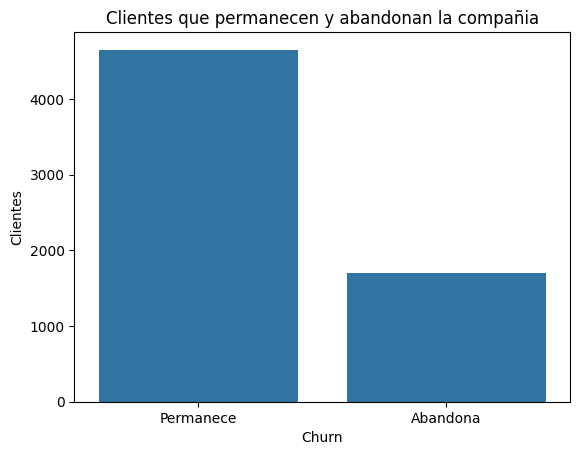

In [ ]:
#CLientes que permanecen y abandoan la empresa (Churn)
sns.countplot(data=datos_codificados, x="Churn")
plt.title("Clientes que permanecen y abandonan la compañia")
plt.ylabel("Clientes")
#plt.xlabel("Permanece/Abandona")
etiquetas = ['Permanece', 'Abandona']
plt.xticks([0,1], etiquetas);

In [ ]:
#Clientes por sexo que abandonan la compañia
churn_por_sexo = datos_codificados.groupby("Churn")[["sexo_Female", "sexo_Male"]].sum().reset_index()
churn_por_sexo

,Churn,sexo_Female,sexo_Male
0,0,2295,2358
1,1,859,840


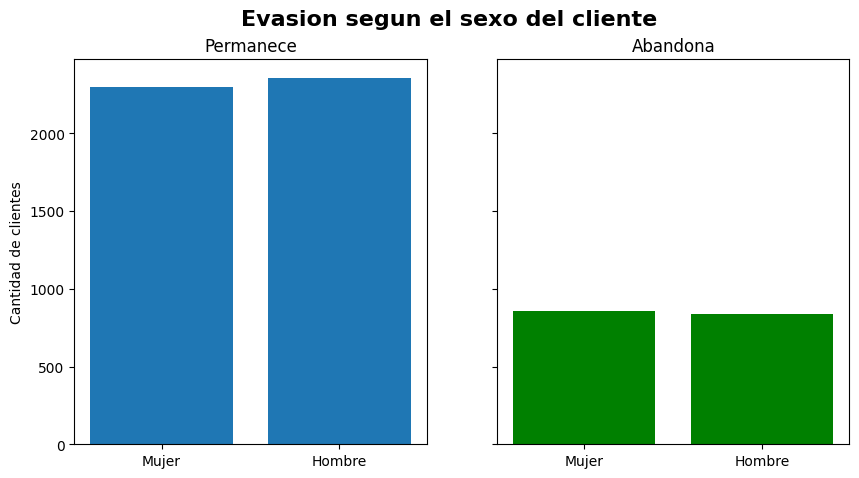

In [ ]:
# Creamos la figura y los dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Subplot 1 - Churn = 0
df_churn0 = churn_por_sexo[churn_por_sexo["Churn"] == 0]
axes[0].bar(["Mujer", "Hombre"], [df_churn0["sexo_Female"].values[0], df_churn0["sexo_Male"].values[0]])
axes[0].set_title("Permanece")
axes[0].set_ylabel("Cantidad de clientes")

# Subplot 2 - Churn = 1
df_churn1 = churn_por_sexo[churn_por_sexo["Churn"] == 1]
axes[1].bar(["Mujer", "Hombre"], [df_churn1["sexo_Female"].values[0], df_churn1["sexo_Male"].values[0]], color="g")
axes[1].set_title("Abandona")

# Ajustamos diseño
#plt.tight_layout()
fig.suptitle('Evasion segun el sexo del cliente', fontsize=16, fontweight='bold')
plt.show()


In [ ]:
df_churn0

,Churn,sexo_Female,sexo_Male
0,0,2295,2358


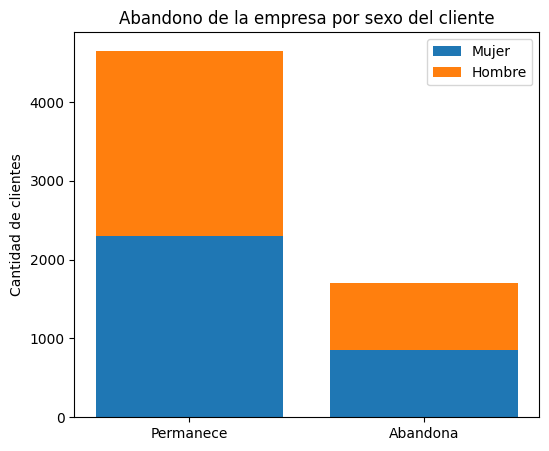

In [ ]:
# Gráfico de barras apiladas segun el sexo del cliente
fig, ax = plt.subplots(figsize=(6,5))

ax.bar(churn_por_sexo["Churn"], churn_por_sexo["sexo_Female"], label="Mujer")
ax.bar(churn_por_sexo["Churn"], churn_por_sexo["sexo_Male"], bottom=churn_por_sexo["sexo_Female"], label="Hombre")

# Etiquetas y título
ax.set_xticks([0, 1])
ax.set_xticklabels(["Permanece", "Abandona"])
ax.set_ylabel("Cantidad de clientes")
ax.set_title("Abandono de la empresa por sexo del cliente")
ax.legend()

plt.show()


In [ ]:
#Clientes por sexo que abandonan o permanecen segun el contrato
churn_contrato = datos_codificados.groupby("Churn")[["Contract_Month-to-month","Contract_One year","Contract_Two year"]].sum().reset_index()
churn_contrato

,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1997,1175,1481
1,1,1502,152,45


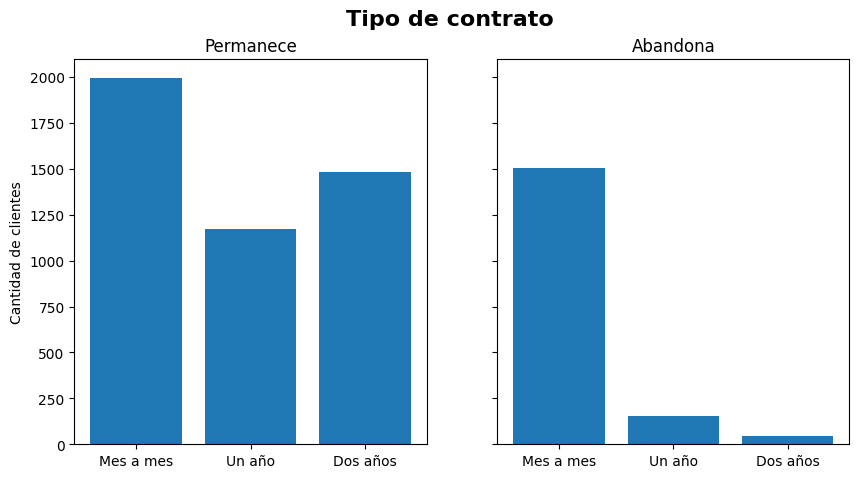

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)

# Subplot 1: Churn = 0
df0 = churn_contrato[churn_contrato["Churn"] == 0]
axes[0].bar(["Mes a mes", "Un año", "Dos años"],
            [df0["Contract_Month-to-month"].values[0],
             df0["Contract_One year"].values[0],
             df0["Contract_Two year"].values[0]])
axes[0].set_title("Permanece")
axes[0].set_ylabel("Cantidad de clientes")

# Subplot 2: Churn = 1
df1 = churn_contrato[churn_contrato["Churn"] == 1]
axes[1].bar(["Mes a mes", "Un año", "Dos años"],
            [df1["Contract_Month-to-month"].values[0],
             df1["Contract_One year"].values[0],
             df1["Contract_Two year"].values[0]])
axes[1].set_title("Abandona")

# Ajustar diseño
#plt.tight_layout()
fig.suptitle('Tipo de contrato', fontsize=16, fontweight='bold')
plt.show()



In [ ]:
#Clientes por sexo que abandonan o permanecen segun el metodo de pago
churn_pago = datos_codificados.groupby("Churn")[["PaymentMethod_Bank transfer (automatic)",
                                                 "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check",
                                                 "PaymentMethod_Mailed check"]].sum().reset_index()
churn_pago

,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1163,1155,1164,1171
1,1,237,213,975,274


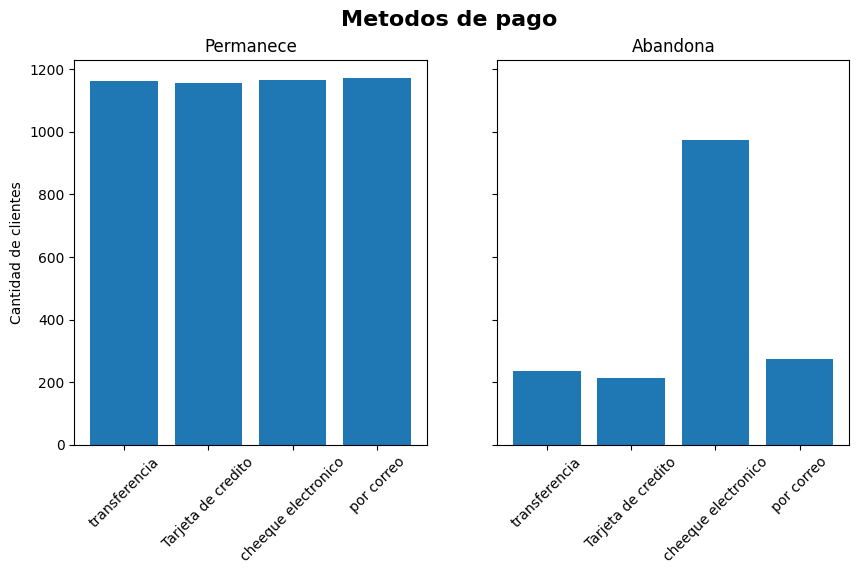

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)

# Subplot 1: Churn = 0
datos0 = churn_pago[churn_pago["Churn"] == 0]
axes[0].bar(["transferencia", "Tarjeta de credito", "cheeque electronico", "por correo"],
            [datos0["PaymentMethod_Bank transfer (automatic)"].values[0],
             datos0["PaymentMethod_Credit card (automatic)"].values[0],
             datos0["PaymentMethod_Electronic check"].values[0],
             datos0["PaymentMethod_Mailed check"].values[0]])
axes[0].set_title("Permanece")
axes[0].set_ylabel("Cantidad de clientes")
axes[0].tick_params(axis='x', labelrotation=45)

# Subplot 2: Churn = 1
datos1 = churn_pago[churn_pago["Churn"] == 1]
axes[1].bar(["transferencia", "Tarjeta de credito", "cheeque electronico", "por correo"],
            [datos1["PaymentMethod_Bank transfer (automatic)"].values[0],
             datos1["PaymentMethod_Credit card (automatic)"].values[0],
             datos1["PaymentMethod_Electronic check"].values[0],
             datos1["PaymentMethod_Mailed check"].values[0]])
axes[1].set_title("Abandona")

# Ajustar diseño
plt.xticks(rotation=45)
#plt.tight_layout()
fig.suptitle('Metodos de pago', fontsize=16, fontweight='bold')
plt.show()



In [ ]:
datos_codificados.sample(1)

,Churn,tenure,MultipleLines,PaperlessBilling,Charges.Monthly,Cuentas_Diarias,sexo_Female,sexo_Male,SeniorCitizen_MayorIgual_65,SeniorCitizen_Menor_65,...,StreamingMovies_No internet service,StreamingMovies_No_Movies,StreamingMovies_Yes_Movies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4034,0,19,0,0,58.2,1.94,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
#Calcular el total gastado por cliente
datos_codificados["gasto_total"] = datos_codificados['Charges.Monthly'] * datos_codificados['tenure']

In [ ]:
#datos_codificados.to_csv("datos_codificados_2.csv")

In [ ]:
total_gastado = datos_codificados.groupby("Churn")["gasto_total"].sum().reset_index()
total_gastado

,Churn,gasto_total
0,0,12289796.55
1,1,2745196.50


In [ ]:
total_gastado['gasto_total'].values[1]

np.float64(2745196.5)

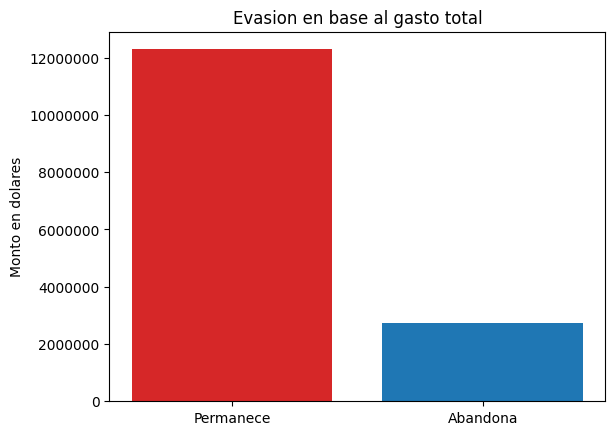

In [ ]:
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue']

ax.bar(["Permanece", "Abandona"], [total_gastado["gasto_total"].values[0],
                                   total_gastado['gasto_total'].values[1]], color=bar_colors)

ax.set_ylabel('Monto en dolares')
ax.set_title('Evasion en base al gasto total')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

datos_codificados = pd.read_csv("/content/datos_codificados_2.csv")

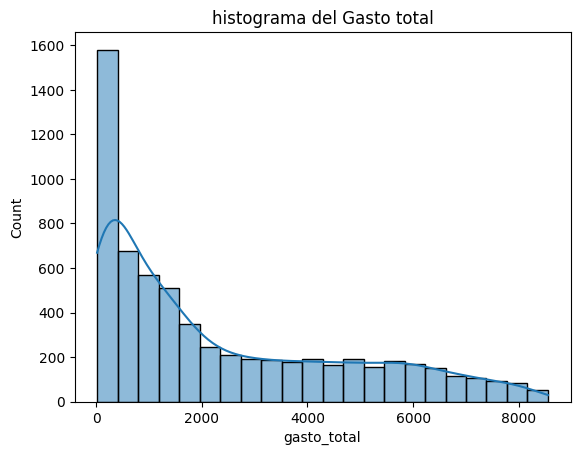

In [ ]:
sns.histplot(data=datos_codificados, x='gasto_total', kde=True);
plt.title("histograma del Gasto total");

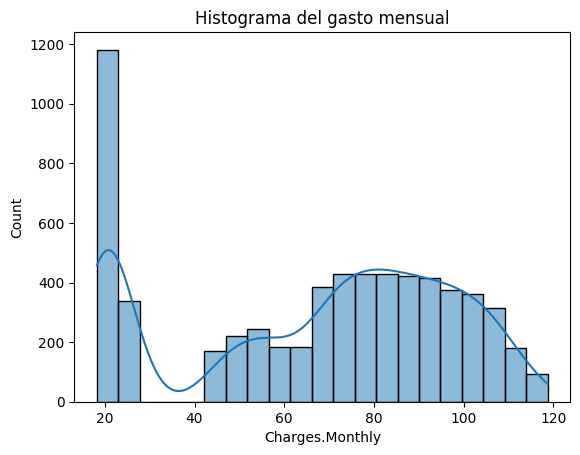

In [ ]:
sns.histplot(data=datos_codificados, x='Charges.Monthly', kde=True)
plt.title("Histograma del gasto mensual");

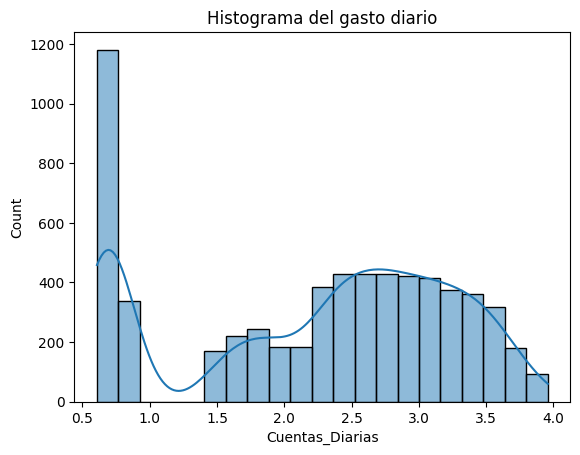

In [ ]:
sns.histplot(data=datos_codificados, x='Cuentas_Diarias', kde=True)
plt.title("Histograma del gasto diario");

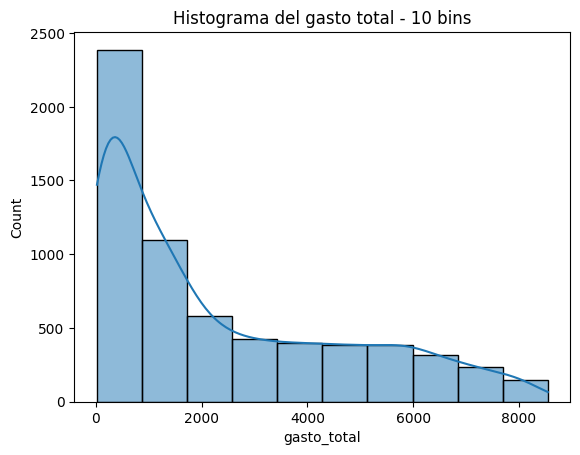

In [ ]:
sns.histplot(data=datos_codificados, x='gasto_total', kde=True, bins=10)
plt.title("Histograma del gasto total - 10 bins");

#**📄Informe final**

##Introducción


**Telecom X - Fuga de clientes (Churn)**

Una compañia telefónica necesita entender los factores que están llevando a una parte de su cartera de clientes a abandonar la compañia.

Como parte del equipo de análisis de datos de Telecom X, nuestro objetivo será
recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa que permita explicar la fuga de la clientela de la compañia.

Se espera que a partir de tu análisis, el equipo de ciencia de datos pueda avanzar en modelos predictivos y desarrollar estrategias para reducir la fuga de clientes.

**Limpieza y tratamiento de datos**

- Para importar los datos desde el repositorio, se utilizaron los módulos json y requests, y un link a la versión cruda (raw )del json que contiene los datos. El link queda como sigue:

"https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

- Luego de importar los datos, pudo observarse que el dataframe presentaba cuatro columnas con datos anidados (customer, internet pone y account). Para “aplanar” o pasar dichas columnas a un formato tabular legible, se utilizó la función pandas.json_normalize de la biblioteca de Pandas.

- Filas sin datos: aunque el método DataFrame.info() aplicado al dataframe de datos ya normalizado con json_normalize, no mostraba datos nulos, se pudo observar que faltaba información en algunas columnas como Churn, tenure y Charges.Total.

- Se procedió a eliminar los registros de los clientes con Churn y tenure inexistente, por lo que los registros sin Charge.total también fueron eliminadas.

- La columna Charges.Total, originalmente de tipo carácter, se convirtió a tipo flotante usando el método astype().

- Se remueve la columna PhoneService, ya que para el análisis se considera a los que ya poseen el servicio.

- Se elimina a los clientes que no poseen líneas telefónicas.

- Se renombraron datos categóricos para mayor claridad de cada una de las categorías, como por ejemplo, Yes o  No, que fueron reemplazados por etiquetas más descriptivas.

- Feature engineering. se realizó una codificación de las datos (featuree encoding) del dataframe principal, utilizado a loa largo del análisis, mediante la herramienta get_dummies de Pandas, para aplicar one-hot encoding.

- Se utilizaron las bibliotecas seabonr y matplotlib para generar las gráficas que pueden observarse en el cuaderno, a partir de los datos ya codificados.

**Análisis exploratotio**



**NOTA:** ver también las gráficas y cuadros de la sección Carga y análisis, más arriba eb este cuaderno.

- En la gráfica siguiente puede observarse el porcentaje de la clientela que permanece o se fuga de la compañia:

In [ ]:
total = datos_codificados['Churn'].count()
abandona = datos_codificados['Churn'].sum()
permanece = datos_codificados['Churn'].count() - abandona

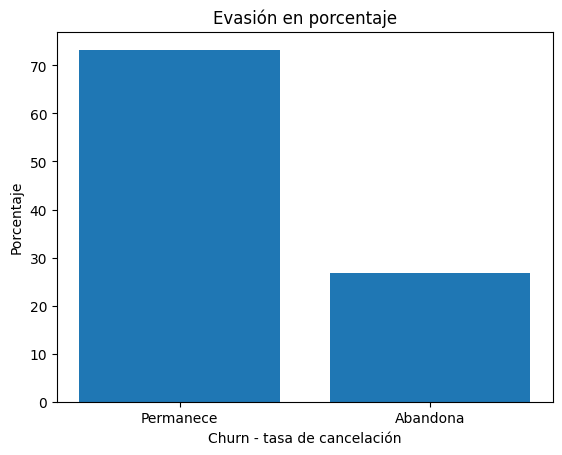

In [ ]:
#CLientes que permanecen y abandoan la empresa (Churn)
churn_etiquetas = ['Permanece', 'Abandona']
churn_porcentajes = [(permanece/total)*100, (abandona/total)*100]

plt.bar(churn_etiquetas, churn_porcentajes)
plt.title('Evasión en porcentaje')
plt.xlabel('Churn - tasa de cancelación')
plt.ylabel('Porcentaje')
plt.show()

## **Algunas conclusiones**

- Respecto a la tasa de cancelación o abandono de los clientes esta se ubica en torno al 27%. Debe tenerse en cuenta que solo se consideraron los registros de clientes con al menos una línea y servicio.

- Se puede observar que la mayoría de los clientes gastan alrededor de 20 dólares mensuales (como se puede ver en el histograma en este cuaderno).

- Un punto curioso, tal vez para analizar más profundamente con posterioridad, es que los clientes que abandonan la empresa preferentemente utilizan los cheques digitales como forma de pago (ver gráfico de barras). Los clientes que permanecen en la empresa, utilizan todos los métodos de pago que se distribuyen de manera muy similar.

- Entre los clientes que permanecen en la empresa, no hay mucha variación respecto a los tipos de contratos, si bien los contratos mensuales predominan sin dudas sobre el resto. En cambio, si es altamente apreciable la diferencia entre los clientes que cancelan el contrato con la compañía, en donde la mayoría optó por un contrato mensual.

- En tanto el sexo del cliente, no se aprecia una diferencia de importancia entre hombres y mujeres con respecto ala tasa de abandono y permanencia en la empresa.

- Sobre el gato total, se aprecia una asimetría a la derecha en el histograma de frecuencias (ver gráfica más arriba en el cuaderno). La mayoría de los clientes no pasan los 2000 dólares en total.

- El histograma de los meses de contrato muestra una gran proporción de clientes que se han unido en los últimos meses (menos de 10 meses en al cartera de clientes). Pero luego se reduce notoriamente, y ya se reduce hasta una tercera parte los clientes que acumulan 10 o más mese en la empresa, lo que indica una tasa de cancelación notable (ver gráfica abajo). S no fuera así, no se esperaría una diferencia notable en la altura de las barras (intervalos).

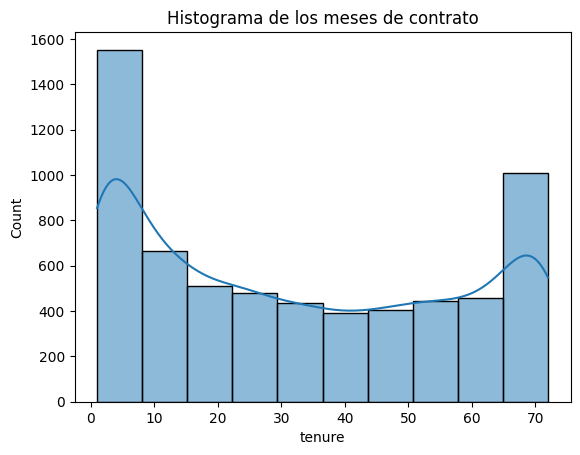

In [ ]:
sns.histplot(data=datos_codificados, x='tenure', kde=True, bins=10)
plt.title("Histograma de los meses de contrato");

##**Recomendaciones:**

Lo visto hasta ahora, lo mejor sería asegurar la fidelidad del cliente, ya que, si se consideran los meses de contrato, la mayoría no superar los 10 meses en la cartera de clientes de la empresa.

Tal vez ofreciendo más servicios dentro de una tarifa plana y por mayor tiempo podría afianzar la permanencia de los clientes en la empresa. Renovar y mejorar los servicios premiando la fidelidad (tal vez antes de los 10 meses), de los clientes con ofertas duraderas y mejora en los servicios sin costos adicionales podría ser una forma de asegurar una baja tasa de cancelación.


##EXTRA correlación
- Análsis respecto al pago mensual de los servicios contratados.

In [ ]:
df_nuevo = datos[["tenure", "Charges.Monthly"]]

In [ ]:
correlacion = df_nuevo.corr()

In [ ]:
#Correlación
correlacion['tenure']

,tenure
tenure,1.000000
Charges.Monthly,0.246862


##Comentario

- Se considera a los meses en la empresa como la variable dependiente.

- Se observa que la correlación es positiva entre el costo de los servicios y la cantidad de meses que un cliente se mantiene en la empresa.

- La correlación es en realidad leve, pero puede ser un posible indicador de que los servicios pueden estar influyendo en la tasa de cancelación de la clientela. A mayor pago mensual, más servicios contratados, por lo que habría que analizar que sucede con cada uno de estos servicios y el "tenure".


In [ ]:
analisis_corr = datos_codificados.corr()

In [ ]:
analisis_corr["Churn"]

,Churn
Unnamed: 0,-0.016539
Churn,1.000000
tenure,-0.351333
MultipleLines,0.040207
PaperlessBilling,0.195949
Charges.Monthly,0.216299
Cuentas_Diarias,0.216299
sexo_Female,0.010944
sexo_Male,-0.010944
SeniorCitizen_MayorIgual_65,0.148483


##Comentario

- Variable dependiente: tenure o tasa de cancelación

- Se advierten indicadores de correlación moderados, positivos y negativos, siendo los más notables la correlación con los métodos de pago y la permanencia en la empresa como cliente.